In [3]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as si
import plotly.express as px
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D

Black and Scholes

# Les inputs

- S : prix du stock
- K : Strike de l'option
- r : taux d'intérêt sans risque 
- sigma : volatilité du sous jacent
- t : temps avant maturité

In [4]:
def black_and_scholes_call_value (S, K, r, t, sigma) :
    d1 = (np.log(S/K)+(r+sigma*sigma/2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - (sigma*np.sqrt(t))
    call_value = S*(si.norm.cdf(d1))-(K*np.exp(-r*t))*si.norm.cdf(d2)
    return call_value

def black_and_scholes_put_value (S, K, r, t, sigma) :
    d1 = (np.log(S/K)+(r+sigma*sigma/2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - (sigma*np.sqrt(t))
    put_value = -S*(si.norm.cdf(-d1))+K*np.exp(-r*t)*si.norm.cdf(-d2)
    return put_value

In [5]:
black_and_scholes_put_value(S = 90, K = 80, r = 0.05, t = 0.05, sigma = 0.35)

0.17849280922771538

# Greeks
Les lettres grecques sont utilisées dans la gestion de portefeuilles d'options. En effet, elles sont considérées comme des indicateurs de risque que le gérant/trader peut monitorer afin de désensibiliser le portfeuille d'options à certains paramètres (on peut par exemple etre insensible aux variations de l'action sous-jacente avec un delta = 0 mais réaliser du profit l'argent avec le gamma ou le vega) :
- Delta (sensibilité du prix de l'option à la variation du sous jacent ou encore, la dérivée du prix de l'option par rapport au prix du sous-jacent)
- Gamma (sensiblité du prix de l'option à la variation du gamma, ou encore la dérivée seconde du prix de l'option par rapport au prix du sous-jacent)
- Vega (sensibilité du prix de l'option pour une variation d'un point de base de volatilité)

In [116]:
prix_call = []
prix_put = []
prix_spot = []
delta_call = []
gamma_call = []
#for periode 0 to 2 :
 #   time = periode

for spot in range(1,200,1) :
    prix_spot.append(spot)#on a remplie la liste prix spot de 1 à 199
    prix_call.append(black_and_scholes_call_value(S = spot, K = 100, r = 0.05, t = 0.25, sigma = 0.35))#en faisant appel a la fonction de black & scholes je calcul le prix de mon call
    prix_put.append(black_and_scholes_put_value(S = spot, K = 100, r = 0.05, t = 0.25, sigma = 0.35))

# Delta
for spot in range(0,199,1) :
        if spot == 0 :
            delta_call.append(0)
        else : 
            delta_call.append((prix_call[spot]-prix_call[spot-1])/((prix_spot[spot]-prix_spot[spot-1])))#variation du prix du call entre t et t-1 diviser par le prix sport du ss jacent t et t-1
        
        if spot == 0 :
            gamma_call.append(0)
        else : 
            gamma_call.append((delta_call[spot]-delta_call[spot-1])/((prix_spot[spot]-prix_spot[spot-1])))
    
    

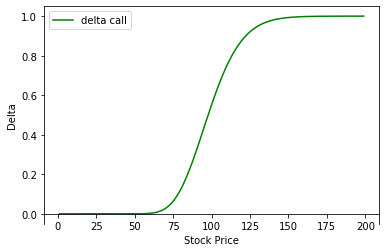

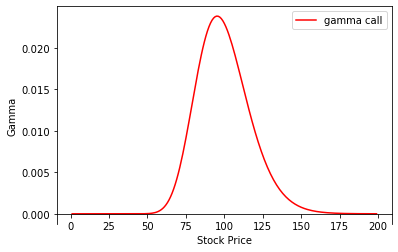

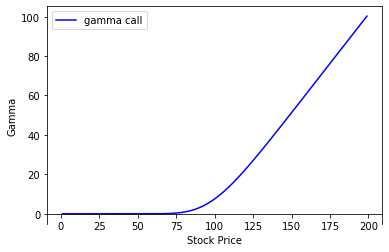

In [117]:
fig, ax = plt.subplots()
ax.spines['bottom'].set_position('zero')
ax.plot(prix_spot,delta_call, label = 'delta call', color = 'g')
plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.legend()
plt.show()

fig, ax = plt.subplots()
ax.spines['bottom'].set_position('zero')
ax.plot(prix_spot,gamma_call, label = 'gamma call', color = 'r')
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
plt.legend()
plt.show()

fig, ax = plt.subplots()
ax.spines['bottom'].set_position('zero')
ax.plot(prix_spot,prix_call, label = 'prix call à au momnent t', color = 'b')
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
plt.legend()
plt.show()

In [113]:
prix_spot = []
prix_call = []
prix_put = []
vol_sigma = []
temps = []
vega_call = []
gamma_call = []


for vol in range(1,1000,1) :
    if vol == 0 :
        vol_sigma.append(0)
        prix_spot.append(0)
        temps.append(0)
    else :
        vol_sigma.append(vol/100)
        prix_spot.append(vol*0.2)
        temps.append(vol/500)
        prix_call.append(black_and_scholes_call_value(S = prix_spot[vol-1], K = 100, r = 0.5, t = temps[vol-1], sigma = vol_sigma[vol-1]))
        prix_put.append(black_and_scholes_put_value(S = 90, K = 80, r = 0.05, t = 0.25, sigma = vol_sigma[vol-1]))
    
for vol in range(0,1000-1,1) :
        if vol == 0 :
            vega_call.append(0)
        else : 
            vega_call.append((prix_call[vol]-prix_call[vol-1])/((vol_sigma[vol]-vol_sigma[vol-1])))

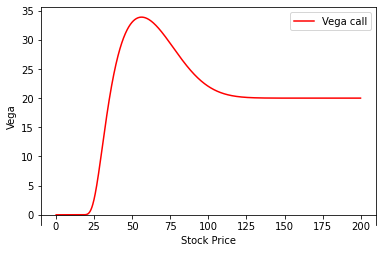

In [114]:
fig, ax = plt.subplots()
figsize=(20,1) 
ax.spines['bottom'].set_position('zero')
ax.plot(prix_spot,vega_call, label = 'Vega call', color = 'r')
plt.xlabel('Stock Price')
plt.ylabel('Vega')
plt.legend()
plt.show()

In [ ]:
fig, ax = plt.subplots()
ax.spines['bottom'].set_position('zero')
ax.plot(prix_spot,prix_put, label = 'Call price', color = 'r')
ax.plot(prix_spot,prix_call, label = 'Call price', color = 'b')
plt.xlabel('Stock Price')
plt.ylabel('Option price')
plt.legend()
plt.show()

# Payoff d'un call/put
- Ce sont les profils de gains des options à l'échéance

Quel est le prix de l'action ? 90
Quel est le strike de l'option ? 100
Quel est le premium de l'option ? 2


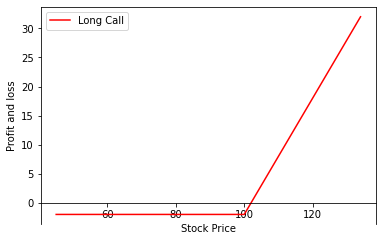

In [9]:

Spot = float(input("Quel est le prix de l'action ?"))
K = float(input ("Quel est le strike de l'option ?"))
premium = float(input("Quel est le premium de l'option ?"))

S = np.arange(0.5*Spot, 1.5*Spot,1)

def call_payoff (S, K, premium):
    return np.where(S> K, S-K,0)-premium
payoff = call_payoff (S, K, premium)

# Plot
fig, ax = plt.subplots()
ax.spines['bottom'].set_position('zero')
ax.plot(S,payoff, label = 'Long Call', color = 'r')
plt.xlabel('Stock Price')
plt.ylabel('Profit and loss')
plt.legend()
plt.show()

Quel est le prix de l'action ? 100
Quel est le strike de l'option ? 90
Quel est le premium de l'option ? 2


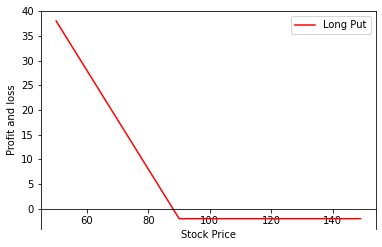

In [10]:

Spot = float(input("Quel est le prix de l'action ?"))
K = float(input ("Quel est le strike de l'option ?"))
premium = float(input("Quel est le premium de l'option ?"))

S = np.arange(0.5*Spot, 1.5*Spot,1)

def put_payoff (S, K, premium):
    return np.where(S < K, K-S,0)-premium
payoff = put_payoff (S, K, premium)

# Plot
fig, ax = plt.subplots()
ax.spines['bottom'].set_position('zero')
ax.plot(S,payoff, label = 'Long Put', color = 'r')
plt.xlabel('Stock Price')
plt.ylabel('Profit and loss')
plt.legend()
plt.show()

Quel est le prix de l'action ? 100
Quel est le strike de l'option ? 100
Quel est le premium de l'option ? 2


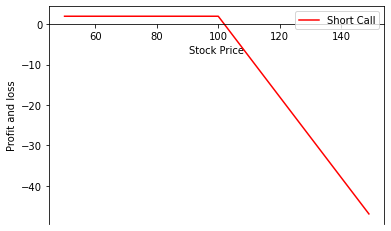

In [11]:

Spot = float(input("Quel est le prix de l'action ?"))
K = float(input ("Quel est le strike de l'option ?"))
premium = float(input("Quel est le premium de l'option ?"))

S = np.arange(0.5*Spot, 1.5*Spot,1)

def call_short_payoff (S, K, premium):
    return np.where(S< K, 0,K-S)+premium
payoff = call_short_payoff (S, K, premium)

# Plot
fig, ax = plt.subplots()
ax.spines['bottom'].set_position('zero')
ax.plot(S,payoff, label = 'Short Call', color = 'r')
plt.xlabel('Stock Price')
plt.ylabel('Profit and loss')
plt.legend()
plt.show()

Quel est le prix de l'action ? 100
Quel est le strike de l'option ? 100
Quel est le premium de l'option ? 20


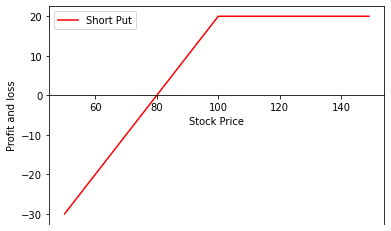

In [12]:

Spot = float(input("Quel est le prix de l'action ?"))
K = float(input ("Quel est le strike de l'option ?"))
premium = float(input("Quel est le premium de l'option ?"))

S = np.arange(0.5*Spot, 1.5*Spot,1)

def put_short_payoff (S, K, premium):
    return np.where(S>K, 0,S-K)+premium
payoff = put_short_payoff (S, K, premium)

# Plot
fig, ax = plt.subplots()
ax.spines['bottom'].set_position('zero')
ax.plot(S,payoff, label = 'Short Put', color = 'r')
plt.xlabel('Stock Price')
plt.ylabel('Profit and loss')
plt.legend()
plt.show()